In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data.csv')

In [3]:
data = shuffle(data)

In [4]:
data.tail()

,confidence,triples,abstract,body,Introduction,Background,Materials and methods,Discussion,Conclusions,Length of triple,Classification
12584,1.0,increased CB2 mRNA expression suggest activiti...,0,True,0,0,0,0,0,92,0
104227,1.0,PEDF reverse effect of endo thelial cells on s...,0,True,0,0,0,0,0,55,0
21874,1.0,levels are where observed,0,True,0,0,0,0,0,25,0
243361,1.0,mechanisms However remain to deeply elucidated,0,True,0,0,0,0,0,46,0
212220,1.0,their functions are generally associated with ...,0,True,0,0,0,0,0,73,0


In [5]:
def get_value_count(feature):
    return data[feature].value_counts()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263463 entries, 10479 to 212220
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   confidence             263463 non-null  float64
 1   triples                263463 non-null  object 
 2   abstract               263463 non-null  int64  
 3   body                   263463 non-null  bool   
 4   Introduction           263463 non-null  int64  
 5   Background             263463 non-null  int64  
 6   Materials and methods  263463 non-null  int64  
 7   Discussion             263463 non-null  int64  
 8   Conclusions            263463 non-null  int64  
 9   Length of triple       263463 non-null  object 
 10  Classification         263463 non-null  int64  
dtypes: bool(1), float64(1), int64(7), object(2)
memory usage: 22.4+ MB


In [7]:
def get_unique_data(feature):
    return data[feature].unique()

In [9]:
get_unique_data('Length of triple')

array(['31', 32, 33, '35', '79', '36', '20', '46', '91', '70', 41, '63',
       '112', '61', '50', '39', '59', '28', 50, '55', 74, '80', '120',
       '33', '29', '84', '26', '60', 71, '62', '47', '65', 20, '58', '43',
       '66', 38, 37, '81', '41', '64', '67', '89', '57', '100', 25, 24,
       21, '48', '49', '34', '75', '56', 44, 113, '69', 58, '40', 103,
       '77', 40, '53', 61, '128', '32', '24', '52', '98', 28, 92, 79,
       '44', 76, 45, 54, '37', 80, '87', '86', 73, 53, '73', '38', '27',
       '71', 43, 49, '19', 62, '76', 72, '23', 48, '51', '25', 36, '90',
       '78', '116', '42', '110', 90, 59, '45', '22', 46, '21', '54', '85',
       34, '82', 31, 51, 95, 65, '30', 55, 64, 87, 70, '103', '68', 131,
       23, 88, 67, 39, '97', 89, 118, '109', 26, '95', '18', 12, 18, 82,
       '93', '106', 22, 56, 19, '104', 69, '96', 52, '126', 112, '13', 42,
       '101', '15', 83, 94, 27, 77, 35, 60, 57, 30, 17, '121', '94', 86,
       '129', '74', '72', 66, '107', '12', '14', 84, 

### Since the data contains a categorical data in the dataset which will create problem so we have to replace it with zero

In [10]:
name_triple = {'#NAME?':0}
data.loc[data['Length of triple'] == '#NAME?', 'Length of triple'] = 0

In [11]:
unique_triples_data = data['Length of triple'].unique()

### Checking for missing values

In [12]:
data.isnull().sum()

confidence               0
triples                  0
abstract                 0
body                     0
Introduction             0
Background               0
Materials and methods    0
Discussion               0
Conclusions              0
Length of triple         0
Classification           0
dtype: int64

In [13]:
features = ['Introduction','Background', 'Materials and methods', 'Discussion','Conclusions','Length of triple']

In [14]:
X = data[features]
y = data[['Classification']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [16]:
model = RandomForestClassifier(n_estimators = 20)

In [17]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [18]:
preds = model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test,preds)

In [20]:
print('Accuracy of the model {}'.format(accuracy*100))

Accuracy of the model 99.78934583341241


### Since the accuracy of our model is almost perfect, we need to look for whether the data is balanced or not

In [21]:
get_value_count('Classification')

0    262905
1       558
Name: Classification, dtype: int64

### So here the data is highly imbalanced, and definitely the precision, recall score would be low then

In [22]:
precision_score(y_test,preds),recall_score(y_test,preds)

(0.6, 0.12931034482758622)

### We have the worst recall score and slightly fine precision score, it means the model is not working fine at all for the ones in the dataset, for this we need to balance the dataset first

## SMOTE Analysis

In [23]:
over_sample = SMOTE()
X,y = over_sample.fit_resample(X,y)

In [24]:
y['Classification'].value_counts()

1    262905
0    262905
Name: Classification, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [26]:
model = RandomForestClassifier(n_estimators = 20)

In [27]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [28]:
preds = model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test,preds)

In [30]:
print('Accuracy of the model {}'.format(accuracy*100))

Accuracy of the model 93.74583975200167


### The accuracy of the model has somehow fallen but thats not what we are looking for, we need to check the values for precision and recall

In [31]:
precision_score(y_test,preds), recall_score(y_test,preds)

(0.9819812234244095, 0.8907601535200779)

### Perfect! So the scores for the precision, recall scores are much better now so this model can be used for the prediction of the unseen dataset now with confidence

### Applying KFold Cross Validation

In [32]:
kf = KFold(n_splits=5)

In [33]:
score = cross_val_score(RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.96779255 0.96735513 0.93807649 0.89111086 0.89127251]
Average score: 0.93


### So using KFold for 5 times, we get different values for the estimator each time and then mean value for the accuracy comes out to be 93% which is fairly close to the first model we developed

## Finding the features with best correlation with the classification of the model

In [34]:
data.corr()

,confidence,abstract,body,Introduction,Background,Materials and methods,Discussion,Conclusions,Classification
confidence,1.000000,0.008048,NaN,0.014952,0.018524,0.026681,0.025700,0.015294,0.011262
abstract,0.008048,1.000000,NaN,0.020513,0.020194,0.000323,0.039405,0.023100,0.285921
body,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Introduction,0.014952,0.020513,NaN,1.000000,0.440826,0.354870,0.362758,0.307811,0.106628
Background,0.018524,0.020194,NaN,0.440826,1.000000,0.361930,0.411612,0.420867,0.114339
Materials and methods,0.026681,0.000323,NaN,0.354870,0.361930,1.000000,0.353597,0.361603,0.067117
Discussion,0.025700,0.039405,NaN,0.362758,0.411612,0.353597,1.000000,0.423510,0.193460
Conclusions,0.015294,0.023100,NaN,0.307811,0.420867,0.361603,0.423510,1.000000,0.117373
Classification,0.011262,0.285921,NaN,0.106628,0.114339,0.067117,0.193460,0.117373,1.000000


In [35]:
import seaborn as sns

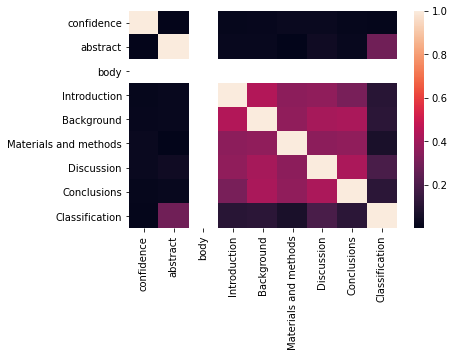

In [36]:
sns.heatmap(data.corr())

In [37]:
data.corrwith(data)

confidence               1.0
abstract                 1.0
body                     NaN
Introduction             1.0
Background               1.0
Materials and methods    1.0
Discussion               1.0
Conclusions              1.0
Classification           1.0
dtype: float64

In [38]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import f_classif
# generate dataset

test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
scores = fit.scores_
print(scores)

[ 28259.855  47895.556  31522.037 216923.61   31217.714  87782.835]


In [39]:
feature_scores = {}
for i in range(len(scores)):
    feature_scores[features[i]] = scores[i]

In [40]:
feature_scores

{'Introduction': 28259.855442536646,
 'Background': 47895.55590523513,
 'Materials and methods': 31522.036846911724,
 'Discussion': 216923.60965697182,
 'Conclusions': 31217.71367249506,
 'Length of triple': 87782.83514947438}

In [41]:
sorted_features = dict(sorted(feature_scores.items(), key=lambda item: item[1], reverse=True))

In [42]:
for s in sorted_features.items():
    print('{} Feature has the correlation score of {} with the target attribute'.format(s[0],s[1]))

Discussion Feature has the correlation score of 216923.60965697182 with the target attribute
Length of triple Feature has the correlation score of 87782.83514947438 with the target attribute
Background Feature has the correlation score of 47895.55590523513 with the target attribute
Materials and methods Feature has the correlation score of 31522.036846911724 with the target attribute
Conclusions Feature has the correlation score of 31217.71367249506 with the target attribute
Introduction Feature has the correlation score of 28259.855442536646 with the target attribute


### So the top features with the rank are as mentioned

In [43]:
for s in sorted_features:
    print(s)

Discussion
Length of triple
Background
Materials and methods
Conclusions
Introduction


<BarContainer object of 6 artists>

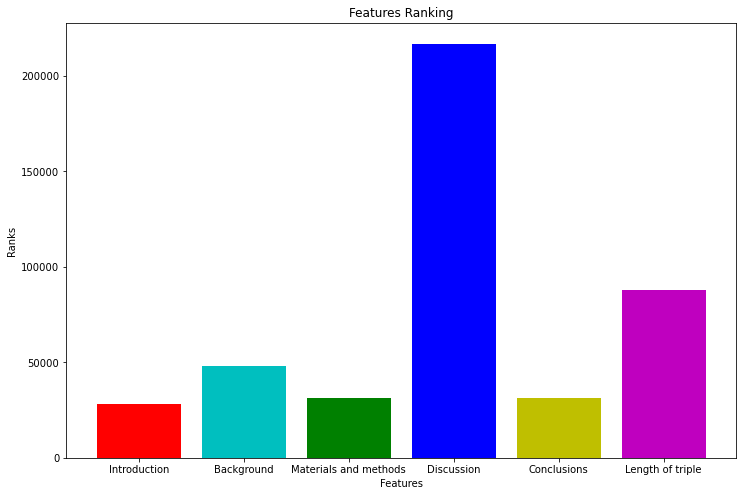

In [45]:
plt.figure(figsize=(12,8))
plt.title('Features Ranking')
plt.xlabel('Features')
plt.ylabel('Ranks')
colors = ['r','g','b','y','c','p']
plt.bar(features,scores,color=['r','c','g','b','y','m'])